## Data exploration

### Load the dataset

In [176]:
import pandas as pd
import seaborn as sns
# I assume we have headers, if we dont will update acordingly
df = pd.read_csv('taxi.train.csv.gz', compression='gzip', header=0)

### Dataset info

In [177]:
print(f"this dataset got {df.shape[0]} lines and {df.shape[1]} columns, here is an example:")
df

this dataset got 2000000 lines and 11 columns, here is an example:


,VendorID,from_datetime,passenger_count,trip_distance,from_longitude,from_latitude,to_longitude,to_latitude,RatecodeFactor,PaymentFactor,y
0,1,2015-11-09 19:42:46,2,1.40,-73.986916,40.739594,-74.002235,40.731457,Standard rate,Credit card,2.835056
1,2,2015-11-23 21:25:43,6,2.02,-73.961960,40.772030,-73.945267,40.793758,Standard rate,Cash,2.607455
2,1,2015-11-13 00:19:25,1,1.00,-73.981407,40.761639,-73.964500,40.756161,Standard rate,Credit card,2.602060
3,1,2015-11-27 05:54:55,1,1.20,-73.998367,40.745533,-73.984047,40.750904,Standard rate,Cash,2.235528
4,2,2015-11-29 01:46:56,1,0.86,-73.986610,40.750401,-73.974464,40.747761,Standard rate,Credit card,2.506505
...,...,...,...,...,...,...,...,...,...,...,...
1999995,1,2015-11-21 22:24:24,1,2.70,-73.961922,40.776180,-73.991203,40.750153,Standard rate,Cash,2.916454
1999996,1,2015-11-28 22:18:26,2,0.80,-73.985893,40.757641,-73.977844,40.749947,Standard rate,Cash,2.634477
1999997,2,2015-11-03 00:42:56,3,0.72,-73.973999,40.764248,-73.983147,40.763138,Standard rate,Credit card,2.472756
1999998,2,2015-11-14 01:14:05,2,5.28,-73.991005,40.727936,-73.949043,40.780163,Standard rate,Credit card,3.047664


In [178]:
# remove rare values
# values with std greated then 1 we will remove we can 'tweek' it later
STD_OFFSET = 1
mean=df['trip_distance'].mean()
std=df['trip_distance'].std()
df["greater" ]= mean+(std*STD_OFFSET)
df["lower"] = mean-(std*STD_OFFSET)

In [179]:
# remove all rare values
fixed_df = df[(df['trip_distance'] > df['lower']) & (df['trip_distance'] < df['greater'])]

max value:8248.9


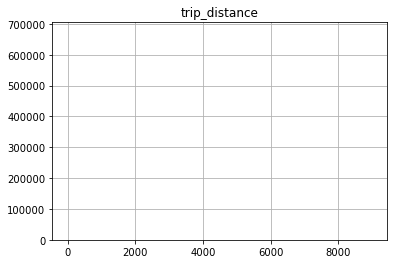

In [239]:
# first find max value and min value
max_val = fixed_df['trip_distance'].max()
print(f"max value:{max_val}")
# we will define the following bins 
hist = fixed_df.hist(column=['trip_distance'], bins=[k//10 for k in range(0,90000,10)])

<ipython-input-181-abd904dbed09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_df['hour'] = pd.to_datetime(fixed_df['from_datetime']).dt.hour


<AxesSubplot:xlabel='hour'>

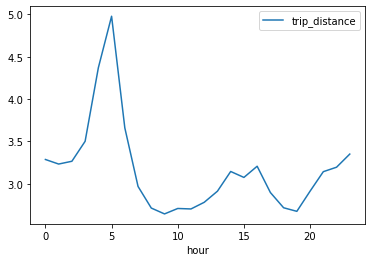

In [181]:
# now calculate the effect of hours on the distance
fixed_df['hour'] = pd.to_datetime(fixed_df['from_datetime']).dt.hour
trip_distance_grouped_by_hours = fixed_df.groupby(['hour']).mean()[['trip_distance']]
trip_distance_grouped_by_hours['hour'] = trip_distance_grouped_by_hours.index
trip_distance_grouped_by_hours.plot(x='hour',y='trip_distance')

<AxesSubplot:xlabel='hour'>

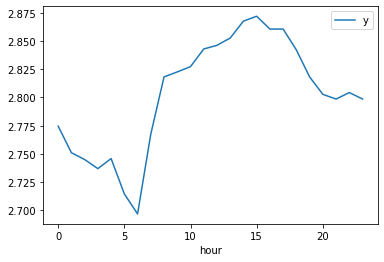

In [182]:
y_grouped_by_hours = fixed_df.groupby(['hour']).mean()[['y']]
y_grouped_by_hours['hour'] = y_grouped_by_hours.index
y_grouped_by_hours.plot(x='hour',y='y')

<AxesSubplot:xlabel='RatecodeFactor'>

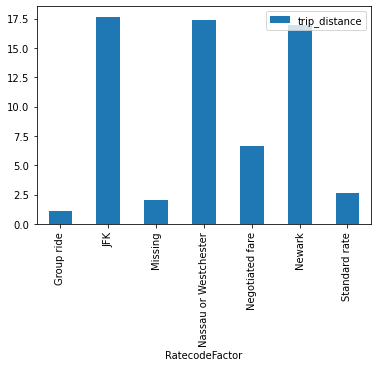

In [183]:
# distance agains VendorId
y_grouped_by_hours = fixed_df.groupby(['RatecodeFactor']).mean()[['trip_distance']]
y_grouped_by_hours['RatecodeFactor'] = y_grouped_by_hours.index
y_grouped_by_hours.plot(x='RatecodeFactor',y='trip_distance', kind='bar')

There is a major differance in the trip distance as function of the RatecodeFactor

<AxesSubplot:xlabel='PaymentFactor'>

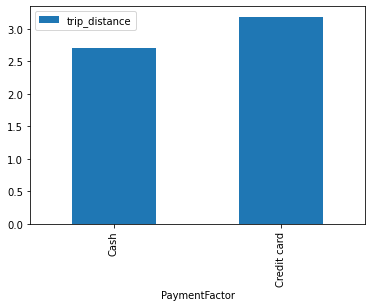

In [184]:
# distance agains VendorId
y_grouped_by_hours = fixed_df.groupby(['PaymentFactor']).mean()[['trip_distance']]
y_grouped_by_hours['PaymentFactor'] = y_grouped_by_hours.index
y_grouped_by_hours.plot(x='PaymentFactor',y='trip_distance', kind='bar')

<AxesSubplot:xlabel='PaymentFactor'>

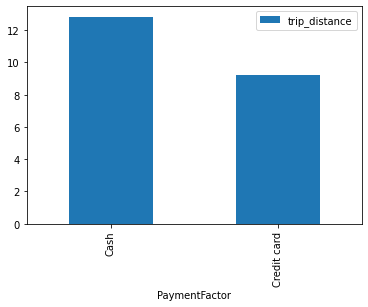

In [185]:
# looks like there is a minor differance, we can see it by grouping by the vendor ID and see the mean distance per group. 
# Now to varify our assumption lets see what heppens to the std
y_grouped_by_hours = fixed_df.groupby(['PaymentFactor']).std()[['trip_distance']]
y_grouped_by_hours['PaymentFactor'] = y_grouped_by_hours.index
y_grouped_by_hours.plot(x='PaymentFactor',y='trip_distance', kind='bar')

<AxesSubplot:xlabel='PaymentFactor'>

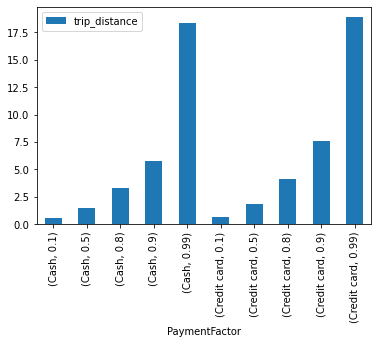

In [186]:
# looks like the std is higher for cash let calculate the quantiles
y_grouped_by_hours = fixed_df.groupby(['PaymentFactor']).quantile([0.1, 0.5, 0.8,  0.9, 0.99])[['trip_distance']]
y_grouped_by_hours['PaymentFactor'] = y_grouped_by_hours.index
y_grouped_by_hours.plot(x='PaymentFactor',y='trip_distance', kind='bar')

Although there is a differance in the std looks like onverall the PaymentFactor doesnt effect the trip distance significaly 

In [188]:
fixed_df['y_mins'] = fixed_df['y']*60

<ipython-input-188-ee7b562452c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_df['y_mins'] = fixed_df['y']*60


In [194]:
std = fixed_df['y_mins'].std()
p50 = fixed_df['y_mins'].quantile([0.5])
print(f"std:{std} p50:{p50}")

std:21.799320752588706 p50:0.5    170.141434
Name: y_mins, dtype: float64


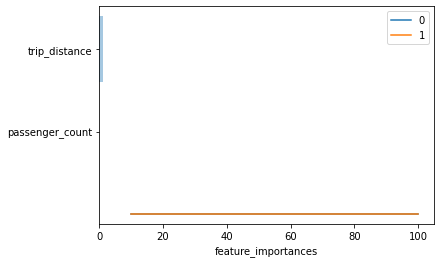

In [219]:
import pandas as pd
import numpy as np
import sklearn.ensemble
import matplotlib.pyplot as plt
import os
import itertools

the_dir = '.'
train_df = pd.read_csv('taxi.train.csv.gz', compression='gzip')
valid_df = pd.read_csv('taxi.valid.csv.gz', compression='gzip')
test_df  = pd.read_csv('taxi.test.no.label.csv.gz', compression='gzip')

columns = ['passenger_count', 'trip_distance']
def create_sklearn_compatible_x_y(df):
    X = df[columns]
    y = df.y.values
    return X, y

X_train, y_train = create_sklearn_compatible_x_y(train_df)
X_valid, y_valid = create_sklearn_compatible_x_y(valid_df)
X_test = test_df[columns]

train_df.iloc[0]

####### Train gradient boosting
max_estimators = 100
model = sklearn.ensemble.GradientBoostingRegressor(n_estimators=max_estimators,
                                                   learning_rate=0.1,
                                                   subsample=.5,
                                                   max_depth=2)
model.fit(X_train, y_train)

# returns an array, where the n'th cell contains the prediction with n+1 boosted trees.
train_staged_y_hat = model.staged_predict(X_train)
valid_staged_y_hat = model.staged_predict(X_valid)
y_hat_iter = list(zip(train_staged_y_hat, valid_staged_y_hat))

sampled_trees = np.linspace(max_estimators//10, max_estimators, max_estimators//10)
res = {}
for n, (train_y_hat, valid_y_hat) in enumerate(y_hat_iter):
    if n+1 not in sampled_trees:
        continue
    # loss l2 distance
    get_l2 = lambda y, y_hat: np.sum((y - y_hat)**2) // np.sum((y - np.mean(y))**2)
    train_l2 = get_l2(y_train, train_y_hat)
    valid_l2 = get_l2(y_valid, valid_y_hat)
    res[n+1] = train_l2, valid_l2

pd.DataFrame(res).T.plot()

plt.barh([1,2], model.feature_importances_, align='center', alpha=0.4)
plt.yticks([1,2], columns)
plt.xlabel('feature_importances')



y_hat_test = model.predict(X_test)
y_hat_df = pd.DataFrame({'y_hat':y_hat_test })

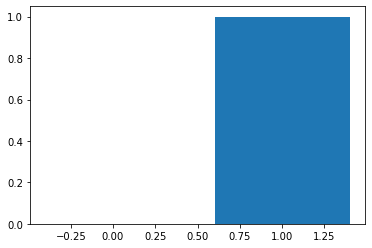

In [231]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()